## Student B Bereinigung und Aufarbeitung der Daten

In diesem Jupyter Notebook file wird aufgezeigt, wie die gescrapten Daten von der Internetseite https://imvdb.com/charts/all bereinigigt und aufbereitet werden. Die Daten enthalten ein Ranking der Musikvideos die am meisten auf Youtube angeschaut worden sind. Mit Hilfe dieser Daten kann unteranderem beantwortet werden ob sich die Dauer der Songs in den letzten Jahren verändert haben und ob sich der Erfolg auf Youtube auch bei den Grammy Awards widerspieglt.

Zu Beginn werden die Bibliotheken Pandas und Numpy geladen. Mit Hilfe dieser werden die Daten bereinigt und aufgearbeitet.

In [3]:
import pandas as pd

## Dirty-file

Zuerst wird das gescrapte File in einen Dataframe geladen. Danach wird zuerst eine Übersicht geschaffen, wo es mögliche Fehler geben könnte.

In [4]:
youtube_charts_dirty = pd.read_csv("Hubacher_Lars_dirty.csv")

In [5]:
youtube_charts_dirty[:10]

,Unnamed: 0,Artist,Song titel,Director,Views auf Youtube
0,Luis Fonsi,Despacito,Carlos Pérez,7.3B,NaN
1,Ed Sheeran,Shape Of You,Jason Koenig,5.3B,NaN
2,Wiz Khalifa,See You Again,Marc Klasfeld,5.1B,NaN
3,Mark Ronson,Uptown Funk,Cameron Duddy,4.2B,NaN
4,Psy,Gangnam Style,Cho Soo-hyun,4.1B,NaN
5,Maroon 5,Sugar,David Dobkin,0.35B,NaN
"6,Katy Perry,Roar,""Grady Hall, Mark Kudsi"",3.3B",NaN,NaN,NaN,NaN,NaN
7,OneRepublic,Counting Stars,James Lees,3.3B,NaN
8,Ed Sheeran,Thinking Out Loud,Emil Nava,32B,NaN
9,Katy Perry,Dark Horse,Mathew Cullen,3.1B,NaN


In [6]:
youtube_charts_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         256 non-null    object 
 1   Artist             256 non-null    object 
 2   Song titel         256 non-null    object 
 3   Director           256 non-null    object 
 4   Views auf Youtube  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 13.1+ KB


## Cleaning
### Spaltennamen ändern, sodass die Spalten den Werten entsprechen
Da die Spalten alle um eins verschoben sind, werden zuerst die Spalten umgenennt

In [7]:
youtube_charts_dirty.columns

Index(['Unnamed: 0', 'Artist', 'Song titel', 'Director', 'Views auf Youtube'], dtype='object')

In [8]:
youtube_charts_dirty.rename(columns={'Unnamed: 0': 'Künstler/in', 'Artist': 'Song', 'Song titel': 'Director', 'Director': 'Views_auf_Youtube', 'Views auf Youtube': 'Unnamed: 0'}, inplace=True)

In [9]:
youtube_charts_dirty

,Künstler/in,Song,Director,Views_auf_Youtube,Unnamed: 0
0,Luis Fonsi,Despacito,Carlos Pérez,7.3B,NaN
1,Ed Sheeran,Shape Of You,Jason Koenig,5.3B,NaN
2,Wiz Khalifa,See You Again,Marc Klasfeld,5.1B,NaN
3,Mark Ronson,Uptown Funk,Cameron Duddy,4.2B,NaN
4,Psy,Gangnam Style,Cho Soo-hyun,4.1B,NaN
...,...,...,...,...,...
275,Pitbull,International Love,David Rousseau,775.8M,NaN
276,Omarion,Post to Be,Jay Ahn,774.3M,NaN
277,Childish Gambino,This Is America,Hiro Murai,772.5M,NaN
278,Eminem,The Monster,Rich Lee,769.8M,NaN


In [10]:
youtube_charts_dirty.drop(columns="Unnamed: 0", inplace=True)

In [11]:
youtube_charts_dirty

,Künstler/in,Song,Director,Views_auf_Youtube
0,Luis Fonsi,Despacito,Carlos Pérez,7.3B
1,Ed Sheeran,Shape Of You,Jason Koenig,5.3B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5.1B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4.2B
4,Psy,Gangnam Style,Cho Soo-hyun,4.1B
...,...,...,...,...
275,Pitbull,International Love,David Rousseau,775.8M
276,Omarion,Post to Be,Jay Ahn,774.3M
277,Childish Gambino,This Is America,Hiro Murai,772.5M
278,Eminem,The Monster,Rich Lee,769.8M


## Fehlerhafte Zeilen, bei denen alle Werte im Index sind korrigieren

Bereits bei der ersten Übersicht sieht man, dass bei einigen Inhalte in in der richtigen Spalte stehen. Damit man aber sieht um viele Zeilen es sich effektiv handelt, werden die Zeilen mit NaN werten gefiltert. 

In [12]:
print(youtube_charts_dirty.isnull().sum())
print(youtube_charts_dirty.isnull().sum().sum())

Künstler/in          24
Song                 24
Director             24
Views_auf_Youtube    24
dtype: int64
96


Es gibt in 24 Zeilen ein Problem mit den Einträgen. Daher werden diese nun gefiltert und ausgegeben, damit man eine Übersicht erhält

In [13]:
Contains_NaN = youtube_charts_dirty.isnull() #Die fehlende Werte werden mit True gekennzeichnet
row_has_NaN = Contains_NaN.any(axis=1)  #Die Zeilen mit fehlenden Werten werden mit True gespeichert als Series
rows_with_NaN = youtube_charts_dirty[row_has_NaN] #Alle Werte mit True werden nun ausgegeben
rows_with_NaN

,Künstler/in,Song,Director,Views_auf_Youtube
"6,Katy Perry,Roar,""Grady Hall, Mark Kudsi"",3.3B",NaN,NaN,NaN,NaN
"23,Clean Bandit,Rockabye,""Jack Patterson, Grace Chatto"",2.5B",NaN,NaN,NaN,NaN
"29,SIA,Chandelier,""SIA, Daniel Askill"",2.4B",NaN,NaN,NaN,NaN
"35,Bruno Mars,The Lazy Song (Version 2),""Bruno Mars, Cameron Duddy"",2.1B",NaN,NaN,NaN,NaN
"39,Avicii,Wake Me Up,""Mark Seliger, C.B. Miller"",2.1B",NaN,NaN,NaN,NaN
"48,Bruno Mars,Thats What I Like,""Bruno Mars, Jonathan Lia"",1.9B",NaN,NaN,NaN,NaN
"75,Macklemore X Ryan Lewis,Thrift Shop,""Jon Jon Augustavo, Ryan Lewis, Macklemore"",1.6B",NaN,NaN,NaN,NaN
"90,Bruno Mars,24K Magic,""Bruno Mars, Cameron Duddy"",1.4B",NaN,NaN,NaN,NaN
"98,Katy Perry,Last Friday Night (T.G.I.F.),""Marc Klasfeld, Danny Lockwood"",1.3B",NaN,NaN,NaN,NaN
"99,Nicky Jam,El Perdón,""Jonathan Craven, Darren Craig"",1.3B",NaN,NaN,NaN,NaN


Damit auf die Zeile zugeriffen udn somit auch bearbeitet werden kann, wird der Befehl .reset_index() ausgeführt.

In [14]:
rows_with_NaN = rows_with_NaN.reset_index()
rows_with_NaN

,index,Künstler/in,Song,Director,Views_auf_Youtube
0,"6,Katy Perry,Roar,""Grady Hall, Mark Kudsi"",3.3B",NaN,NaN,NaN,NaN
1,"23,Clean Bandit,Rockabye,""Jack Patterson, Grac...",NaN,NaN,NaN,NaN
2,"29,SIA,Chandelier,""SIA, Daniel Askill"",2.4B",NaN,NaN,NaN,NaN
3,"35,Bruno Mars,The Lazy Song (Version 2),""Brun...",NaN,NaN,NaN,NaN
4,"39,Avicii,Wake Me Up,""Mark Seliger, C.B. Mille...",NaN,NaN,NaN,NaN
5,"48,Bruno Mars,Thats What I Like,""Bruno Mars, ...",NaN,NaN,NaN,NaN
6,"75,Macklemore X Ryan Lewis,Thrift Shop,""Jon Jo...",NaN,NaN,NaN,NaN
7,"90,Bruno Mars,24K Magic,""Bruno Mars, Cameron D...",NaN,NaN,NaN,NaN
8,"98,Katy Perry,Last Friday Night (T.G.I.F.),""Ma...",NaN,NaN,NaN,NaN
9,"99,Nicky Jam,El Perdón,""Jonathan Craven, Darre...",NaN,NaN,NaN,NaN


Da es bei einigen Reihen unterschiedlich viele Directors hat, werden diese zuerst in ein neues Dataframe extrahiert und später wieder zum Dataframe rows_with_NaN hinzugefügt.
Das extrahieren wird mit dem Befehl .str.extract und dem Regex ".*",  vollzogen. So werden alle Einträge zwischen den Anfrühungs- und Schlusszeichen extrahiert. 

In [15]:
Director_ = rows_with_NaN["index"].str.extract('(".*",)')
Director_

,0
0,"""Grady Hall, Mark Kudsi"","
1,"""Jack Patterson, Grace Chatto"","
2,"""SIA, Daniel Askill"","
3,"""Bruno Mars, Cameron Duddy"","
4,"""Mark Seliger, C.B. Miller"","
5,"""Bruno Mars, Jonathan Lia"","
6,"""Jon Jon Augustavo, Ryan Lewis, Macklemore"","
7,"""Bruno Mars, Cameron Duddy"","
8,"""Marc Klasfeld, Danny Lockwood"","
9,"""Jonathan Craven, Darren Craig"","


Nun werden die Directors aus dem Dataframe rows_with_NaN ersetzt. Dies mit dem Befehl .str.repalce und dem Regex ".*",. Dies wurde bereits oben durchgeführt, aber mit .str.extract.

In [16]:
rows_with_NaN["index"] = rows_with_NaN["index"].str.replace('(".*",)', "")

<ipython-input-16-1dcc3f1eecd1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rows_with_NaN["index"] = rows_with_NaN["index"].str.replace('(".*",)', "")


Die Spalte Director wird gelöscht und später nach Bearbeitung der anderen Daten wieder hinzugefügt mit dem Dataframe Director_.

In [17]:
rows_with_NaN.drop(columns="Director", inplace=True)

Der Dataframe rows_with_NaN wird in eine Liste übergeben und jeweils beim Komma getrennt. So entstehen für die Einträge zwischen den Kommas Strings.

In [18]:
Liste_fehlerhafte_Zeilen = list(rows_with_NaN["index"].str.split(","))
Liste_fehlerhafte_Zeilen

[['6', 'Katy Perry', 'Roar', '3.3B'],
 ['23', 'Clean Bandit', 'Rockabye', '2.5B'],
 ['29', 'SIA', 'Chandelier', '2.4B'],
 ['35', 'Bruno Mars', 'The Lazy Song  (Version 2)', '2.1B'],
 ['39', 'Avicii', 'Wake Me Up', '2.1B'],
 ['48', 'Bruno Mars', 'That\x92s What I Like', '1.9B'],
 ['75', 'Macklemore X Ryan Lewis', 'Thrift Shop', '1.6B'],
 ['90', 'Bruno Mars', '24K Magic', '1.4B'],
 ['98', 'Katy Perry', 'Last Friday Night (T.G.I.F.)', '1.3B'],
 ['99', 'Nicky Jam', 'El Perdón', '1.3B'],
 ['119', 'French Montana', 'Unforgettable', '1.2B'],
 ['124', 'Linkin Park', 'In The End', '1.2B'],
 ['127', 'Billie Eilish', 'lovely', '1.2B'],
 ['128', 'Rihanna', 'Work', '1.2B'],
 ['137', 'SIA', 'Elastic Heart  (Version 1)', '1.2B'],
 ['165', 'Clean Bandit', 'Symphony', '1.1B'],
 ['198', 'Justin Bieber', 'Beauty And A Beat', '957.5M'],
 ['210', 'Mike WiLL Made It', '23', '907.4M'],
 ['222', 'Macklemore X Ryan Lewis', "Can't Hold Us", '882.0M'],
 ['223', 'Aqua', 'Barbie Girl', '878.2M'],
 ['230', 'Travis 

Nun kann die Liste von oben wieder zu einem Dataframe zusammengefügt werden und zusätzlich der Dataframe Director_ angehängt werden. Damit später keine Komplikationen auftreten, wir die Spaltenreihenfolge so gewählt wie beim ursprünlgichen Dataframe.

In [19]:
youtube_charts_dirty_corrected = pd.DataFrame(Liste_fehlerhafte_Zeilen, columns =["Index", 'Künstler/in', 'Song', 'Views_auf_Youtube'])

In [20]:
youtube_charts_dirty_corrected["Director"] = Director_
youtube_charts_dirty_corrected

,Index,Künstler/in,Song,Views_auf_Youtube,Director
0,6,Katy Perry,Roar,3.3B,"""Grady Hall, Mark Kudsi"","
1,23,Clean Bandit,Rockabye,2.5B,"""Jack Patterson, Grace Chatto"","
2,29,SIA,Chandelier,2.4B,"""SIA, Daniel Askill"","
3,35,Bruno Mars,The Lazy Song (Version 2),2.1B,"""Bruno Mars, Cameron Duddy"","
4,39,Avicii,Wake Me Up,2.1B,"""Mark Seliger, C.B. Miller"","
5,48,Bruno Mars,Thats What I Like,1.9B,"""Bruno Mars, Jonathan Lia"","
6,75,Macklemore X Ryan Lewis,Thrift Shop,1.6B,"""Jon Jon Augustavo, Ryan Lewis, Macklemore"","
7,90,Bruno Mars,24K Magic,1.4B,"""Bruno Mars, Cameron Duddy"","
8,98,Katy Perry,Last Friday Night (T.G.I.F.),1.3B,"""Marc Klasfeld, Danny Lockwood"","
9,99,Nicky Jam,El Perdón,1.3B,"""Jonathan Craven, Darren Craig"","


Das Komma am Ender der Einträge Director, sowie die Anführungs- und Schlüsszeichen werden nun entfernt. Dies erfolgt mit dem Befehl .str.replace() und dem Regex ',$'. So wird jeweils das Komma am Ende des Strings entfernt. Die Anführungs- und Schlusszeichen werden mit dem Regex '"'entfernt.

In [21]:
youtube_charts_dirty_corrected["Director"] = youtube_charts_dirty_corrected["Director"].str.replace(',$', "")

<ipython-input-21-6be6a637442a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  youtube_charts_dirty_corrected["Director"] = youtube_charts_dirty_corrected["Director"].str.replace(',$', "")


In [22]:
youtube_charts_dirty_corrected["Director"] = youtube_charts_dirty_corrected["Director"].str.replace('"', "")

In [23]:
youtube_charts_dirty_corrected

,Index,Künstler/in,Song,Views_auf_Youtube,Director
0,6,Katy Perry,Roar,3.3B,"Grady Hall, Mark Kudsi"
1,23,Clean Bandit,Rockabye,2.5B,"Jack Patterson, Grace Chatto"
2,29,SIA,Chandelier,2.4B,"SIA, Daniel Askill"
3,35,Bruno Mars,The Lazy Song (Version 2),2.1B,"Bruno Mars, Cameron Duddy"
4,39,Avicii,Wake Me Up,2.1B,"Mark Seliger, C.B. Miller"
5,48,Bruno Mars,Thats What I Like,1.9B,"Bruno Mars, Jonathan Lia"
6,75,Macklemore X Ryan Lewis,Thrift Shop,1.6B,"Jon Jon Augustavo, Ryan Lewis, Macklemore"
7,90,Bruno Mars,24K Magic,1.4B,"Bruno Mars, Cameron Duddy"
8,98,Katy Perry,Last Friday Night (T.G.I.F.),1.3B,"Marc Klasfeld, Danny Lockwood"
9,99,Nicky Jam,El Perdón,1.3B,"Jonathan Craven, Darren Craig"


In [24]:
youtube_charts_dirty_corrected.columns

Index(['Index', 'Künstler/in', 'Song', 'Views_auf_Youtube', 'Director'], dtype='object')

In [25]:
youtube_charts_dirty_corrected = youtube_charts_dirty_corrected[['Index', 'Künstler/in', 'Song','Director', 'Views_auf_Youtube']]

In [26]:
youtube_charts_dirty_corrected

,Index,Künstler/in,Song,Director,Views_auf_Youtube
0,6,Katy Perry,Roar,"Grady Hall, Mark Kudsi",3.3B
1,23,Clean Bandit,Rockabye,"Jack Patterson, Grace Chatto",2.5B
2,29,SIA,Chandelier,"SIA, Daniel Askill",2.4B
3,35,Bruno Mars,The Lazy Song (Version 2),"Bruno Mars, Cameron Duddy",2.1B
4,39,Avicii,Wake Me Up,"Mark Seliger, C.B. Miller",2.1B
5,48,Bruno Mars,Thats What I Like,"Bruno Mars, Jonathan Lia",1.9B
6,75,Macklemore X Ryan Lewis,Thrift Shop,"Jon Jon Augustavo, Ryan Lewis, Macklemore",1.6B
7,90,Bruno Mars,24K Magic,"Bruno Mars, Cameron Duddy",1.4B
8,98,Katy Perry,Last Friday Night (T.G.I.F.),"Marc Klasfeld, Danny Lockwood",1.3B
9,99,Nicky Jam,El Perdón,"Jonathan Craven, Darren Craig",1.3B


Beim Index Nummer 235 sind die Einträge Director und Song noch vertauscht. Dies wird nun von behoben.

In [27]:
youtube_charts_dirty_corrected.iloc[22]["Song"]= "Perdón"

In [28]:
youtube_charts_dirty_corrected.iloc[22]["Director"] = "No director"

In [29]:
youtube_charts_dirty_corrected

,Index,Künstler/in,Song,Director,Views_auf_Youtube
0,6,Katy Perry,Roar,"Grady Hall, Mark Kudsi",3.3B
1,23,Clean Bandit,Rockabye,"Jack Patterson, Grace Chatto",2.5B
2,29,SIA,Chandelier,"SIA, Daniel Askill",2.4B
3,35,Bruno Mars,The Lazy Song (Version 2),"Bruno Mars, Cameron Duddy",2.1B
4,39,Avicii,Wake Me Up,"Mark Seliger, C.B. Miller",2.1B
5,48,Bruno Mars,Thats What I Like,"Bruno Mars, Jonathan Lia",1.9B
6,75,Macklemore X Ryan Lewis,Thrift Shop,"Jon Jon Augustavo, Ryan Lewis, Macklemore",1.6B
7,90,Bruno Mars,24K Magic,"Bruno Mars, Cameron Duddy",1.4B
8,98,Katy Perry,Last Friday Night (T.G.I.F.),"Marc Klasfeld, Danny Lockwood",1.3B
9,99,Nicky Jam,El Perdón,"Jonathan Craven, Darren Craig",1.3B


In [30]:
youtube_charts_dirty_corrected.count()

Index                24
Künstler/in          24
Song                 24
Director             24
Views_auf_Youtube    24
dtype: int64

### Spalte "Index" als effektiven Index übernehmen und dann die korrigierten Zeilen mit den fehlerhaften austauschen

Nun ewrden die beiden Dataframes youtube_charts_dirty und youtube_charts_dirty_corrected zusammengeführt und überprüft wie viele Duplikate es nun gibt

In [31]:
youtube_charts_dirty_corrected.set_index("Index", inplace=True)

In [32]:
youtube_charts_dirty = pd.concat([youtube_charts_dirty,youtube_charts_dirty_corrected])

In [33]:
Duplikate = youtube_charts_dirty[youtube_charts_dirty.duplicated()]
Duplikate

,Künstler/in,Song,Director,Views_auf_Youtube
"23,Clean Bandit,Rockabye,""Jack Patterson, Grace Chatto"",2.5B",NaN,NaN,NaN,NaN
"29,SIA,Chandelier,""SIA, Daniel Askill"",2.4B",NaN,NaN,NaN,NaN
"35,Bruno Mars,The Lazy Song (Version 2),""Bruno Mars, Cameron Duddy"",2.1B",NaN,NaN,NaN,NaN
"39,Avicii,Wake Me Up,""Mark Seliger, C.B. Miller"",2.1B",NaN,NaN,NaN,NaN
"48,Bruno Mars,Thats What I Like,""Bruno Mars, Jonathan Lia"",1.9B",NaN,NaN,NaN,NaN
"75,Macklemore X Ryan Lewis,Thrift Shop,""Jon Jon Augustavo, Ryan Lewis, Macklemore"",1.6B",NaN,NaN,NaN,NaN
"90,Bruno Mars,24K Magic,""Bruno Mars, Cameron Duddy"",1.4B",NaN,NaN,NaN,NaN
"98,Katy Perry,Last Friday Night (T.G.I.F.),""Marc Klasfeld, Danny Lockwood"",1.3B",NaN,NaN,NaN,NaN
"99,Nicky Jam,El Perdón,""Jonathan Craven, Darren Craig"",1.3B",NaN,NaN,NaN,NaN
"119,French Montana,Unforgettable,""Spiff TV, French Montana"",1.2B",NaN,NaN,NaN,NaN


Insgesamt sind es 24 Duplikate. Mit der Funktion duplicated() wurden aber nur 23 gefunden. Erste Eintrag mit der Indexnummer 6 fehlt und später noch einzeln angeschaut werden.

In [34]:
len(Duplikate)

23

In [35]:
youtube_charts_dirty.drop_duplicates(keep="last", inplace=True)

Es gibt also immer noch einen Eintrag der NaNs enthält. Entgegen der Erwartung sieht man, dass der Eintrag mit der Indexnummer 257 mit dem Befehl drop_duplicates(keep="last") noch immer im Dataframe ist, dafür aber der Eintrag mit der Indexnummer 6 aus dem Dataframe gelöscht wurde.

In [36]:
print(youtube_charts_dirty.isnull().sum())
youtube_charts_dirty.isnull().sum().sum()

Künstler/in          1
Song                 1
Director             1
Views_auf_Youtube    1
dtype: int64


4

In [37]:
Contains_NaN = youtube_charts_dirty.isnull() #Die fehlende Werte werden mit True gekennzeichnet
row_has_NaN = Contains_NaN.any(axis=1)  #Die Zeilen mit fehlenden Werten werden mit True gespeichert als Series
rows_with_NaN = youtube_charts_dirty[row_has_NaN] #Alle Werte mit True werden nun ausgegeben
rows_with_NaN

,Künstler/in,Song,Director,Views_auf_Youtube
"257,Red Hot Chili Peppers,Californication,""Jonathan Dayton, Valerie Faris"",818.5M",NaN,NaN,NaN,NaN


In [38]:
youtube_charts_dirty[:10]

,Künstler/in,Song,Director,Views_auf_Youtube
0,Luis Fonsi,Despacito,Carlos Pérez,7.3B
1,Ed Sheeran,Shape Of You,Jason Koenig,5.3B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5.1B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4.2B
4,Psy,Gangnam Style,Cho Soo-hyun,4.1B
5,Maroon 5,Sugar,David Dobkin,0.35B
7,OneRepublic,Counting Stars,James Lees,3.3B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,32B
9,Katy Perry,Dark Horse,Mathew Cullen,3.1B
10,Taylor Swift,Shake It Off,Mark Romanek,3.0B


In [39]:
youtube_charts_dirty[280:]

,Künstler/in,Song,Director,Views_auf_Youtube
257,Red Hot Chili Peppers,Californication,"Jonathan Dayton, Valerie Faris",818.5M


In [40]:
youtube_charts_dirty.dropna(inplace=True)

In [41]:
print(youtube_charts_dirty.isnull().sum())

Künstler/in          0
Song                 0
Director             0
Views_auf_Youtube    0
dtype: int64


In [42]:
youtube_charts_dirty.count()

Künstler/in          280
Song                 280
Director             280
Views_auf_Youtube    280
dtype: int64

## Aufereitung

### Views auf Youtube in die gleiche Masseinheit umwandeln

Bei den Views auf Youtube stehen einige Einträge in Milliarden und andere in Millionen Beträge. Damit diese Einheitlich sind, wurden die Einträge mit einem "B", was für Milliarden steht in Millionen umgewandelt. Damit diese aber funktioniert, wird der Buchstabe, "B" beziehungsweise "M" in eine neue Spalte verschoben und die Spalte Views_auf_Youtube in ein Float umgewandelt. Damit es für andere Personen keine Unklarheiten gibt wir der Spaltentitel umbennent, sodass man weiss um was für Zahlen es sich handelt.

In [43]:
youtube_charts_dirty.dtypes

Künstler/in          object
Song                 object
Director             object
Views_auf_Youtube    object
dtype: object

In [44]:
views_auf_youtube = youtube_charts_dirty["Views_auf_Youtube"]
views_auf_youtube

0        7.3B
1        5.3B
2        5.1B
3        4.2B
4        4.1B
        ...  
223    878.2M
230    859.4M
231    856.9M
235    851.4M
257    818.5M
Name: Views_auf_Youtube, Length: 280, dtype: object

In [45]:
youtube_charts_dirty["Einheit"] = youtube_charts_dirty["Views_auf_Youtube"].str.extract('([A-Z])')

In [46]:
youtube_charts_dirty.iloc[6]

Künstler/in             OneRepublic
Song                 Counting Stars
Director                 James Lees
Views_auf_Youtube              3.3B
Einheit                           B
Name: 7, dtype: object

In [47]:
youtube_charts_dirty["Views_auf_Youtube"] = youtube_charts_dirty["Views_auf_Youtube"].str.extract('([0-9.0-9]+)')

In [48]:
youtube_charts_dirty[:20]

,Künstler/in,Song,Director,Views_auf_Youtube,Einheit
0,Luis Fonsi,Despacito,Carlos Pérez,7.3,B
1,Ed Sheeran,Shape Of You,Jason Koenig,5.3,B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5.1,B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4.2,B
4,Psy,Gangnam Style,Cho Soo-hyun,4.1,B
5,Maroon 5,Sugar,David Dobkin,0.35,B
7,OneRepublic,Counting Stars,James Lees,3.3,B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,32,B
9,Katy Perry,Dark Horse,Mathew Cullen,3.1,B
10,Taylor Swift,Shake It Off,Mark Romanek,3.0,B


In [49]:
youtube_charts_dirty.dtypes

Künstler/in          object
Song                 object
Director             object
Views_auf_Youtube    object
Einheit              object
dtype: object

In [50]:
youtube_charts_dirty["Views_auf_Youtube"] = youtube_charts_dirty["Views_auf_Youtube"].astype(float)

In [51]:
youtube_charts_dirty["Views_auf_Youtube"] = youtube_charts_dirty["Views_auf_Youtube"].where(youtube_charts_dirty["Einheit"] == "M",youtube_charts_dirty["Views_auf_Youtube"]*1000)

In [52]:
youtube_charts_dirty.rename(columns={"Views_auf_Youtube": "Views auf Youtube in Mio.", "Artist": "Künstler/in", "Song titel": "Song"}, inplace=True)
youtube_charts_dirty[250:]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
274,Pitbull,We Are One (Ole Ola),Ben Mor,779.8,M
275,Pitbull,International Love,David Rousseau,775.8,M
276,Omarion,Post to Be,Jay Ahn,774.3,M
277,Childish Gambino,This Is America,Hiro Murai,772.5,M
278,Eminem,The Monster,Rich Lee,769.8,M
279,Kygo,Firestone,No director,769.5,M
6,Katy Perry,Roar,"Grady Hall, Mark Kudsi",3300.0,B
23,Clean Bandit,Rockabye,"Jack Patterson, Grace Chatto",2500.0,B
29,SIA,Chandelier,"SIA, Daniel Askill",2400.0,B
35,Bruno Mars,The Lazy Song (Version 2),"Bruno Mars, Cameron Duddy",2100.0,B


In [53]:
youtube_charts_dirty.dtypes

Künstler/in                   object
Song                          object
Director                      object
Views auf Youtube in Mio.    float64
Einheit                       object
dtype: object

In [54]:
youtube_charts_dirty.describe()

,Views auf Youtube in Mio.
count,280.000000
mean,1499.786071
std,1988.063515
min,350.000000
25%,907.375000
50%,1100.000000
75%,1600.000000
max,32000.000000


## Cleaning

### Songtitel anpassen, sodass keine Angaben mehr in Klammer stehen, damit die Songtitel verglichen werden können mit anderen Datensets

Es gibt diverse Songs die noch in einer Klammer zusätzliche Informationen haben, da es aber später beim zusammenführen der csv-Files zu Problemen kommen kann werden die Klammern entfernt aus der Spalte Song.

In [55]:
youtube_charts_dirty[:20]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
0,Luis Fonsi,Despacito,Carlos Pérez,7300.0,B
1,Ed Sheeran,Shape Of You,Jason Koenig,5300.0,B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5100.0,B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4200.0,B
4,Psy,Gangnam Style,Cho Soo-hyun,4100.0,B
5,Maroon 5,Sugar,David Dobkin,350.0,B
7,OneRepublic,Counting Stars,James Lees,3300.0,B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,32000.0,B
9,Katy Perry,Dark Horse,Mathew Cullen,3100.0,B
10,Taylor Swift,Shake It Off,Mark Romanek,3000.0,B


Mit dem Befehl .str.replace() werden nun die Klammern und deren Inhalte aus den Song Titeln gelöscht. Dies passiert mit dem Regex \(.+ . Die Klammer wird nicht wieder geschlssen, da es einige Einträge gibt, bei denen dies nicht der Fall ist. So werden alle Einträge mit Klammern sicher entfernt.

In [56]:
youtube_charts_dirty["Song"] = youtube_charts_dirty["Song"].str.replace("\(.+", "")

<ipython-input-56-a854beedb769>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  youtube_charts_dirty["Song"] = youtube_charts_dirty["Song"].str.replace("\(.+", "")


In [57]:
youtube_charts_dirty[40:80]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
45,Ariana Grande,Side to Side,Hannah Lux Davis,1900.0,B
46,Imagine Dragons,Believer,Matt Eastin,1900.0,B
47,The Weeknd,Starboy,Grant Singer,1900.0,B
49,Christina Perri,A Thousand Years,Jay Martin,1800.0,B
50,Adele,Rolling In The Deep,Sam Brown,1800.0,B
51,Silentó,Watch Me,No director,1800.0,B
52,ROSALÍA,Con Altura,Director X,1800.0,B
53,J Balvin,Ay Vamos,Juan Pablo Valencia,1800.0,B
54,Romeo Santos,Propuesta Indecente,Joaquin Cambre,1700.0,B
55,Drake,Hotline Bling,Director X,1700.0,B


In [58]:
youtube_charts_dirty.describe()

,Views auf Youtube in Mio.
count,280.000000
mean,1499.786071
std,1988.063515
min,350.000000
25%,907.375000
50%,1100.000000
75%,1600.000000
max,32000.000000


Das Maximum und das Minimum sind etwas sehr sehr tief beziehungsweise sehr hoch. Daher wird noch mit einem Boxplot das ganze visualisiert.

<AxesSubplot:>

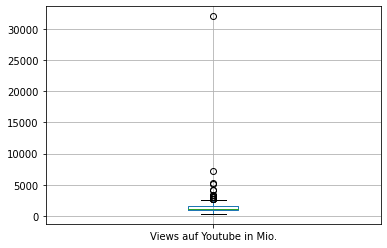

In [59]:
youtube_charts_dirty.boxplot(column="Views auf Youtube in Mio.")

In [60]:
youtube_charts_dirty["Views auf Youtube in Mio."].argmax()

7

In [61]:
youtube_charts_dirty["Views auf Youtube in Mio."].argmin()

5

In [62]:
youtube_charts_dirty[:10]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
0,Luis Fonsi,Despacito,Carlos Pérez,7300.0,B
1,Ed Sheeran,Shape Of You,Jason Koenig,5300.0,B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5100.0,B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4200.0,B
4,Psy,Gangnam Style,Cho Soo-hyun,4100.0,B
5,Maroon 5,Sugar,David Dobkin,350.0,B
7,OneRepublic,Counting Stars,James Lees,3300.0,B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,32000.0,B
9,Katy Perry,Dark Horse,Mathew Cullen,3100.0,B
10,Taylor Swift,Shake It Off,Mark Romanek,3000.0,B


Bei beim Index 5 steht das Komma an der falschen Stelle (es war eine Stelle zu weit vorne) und beim Index 7 ist es eine Stelle zu weit hinten

In [63]:
youtube_charts_dirty.replace(350.0,3500.0, inplace=True)

In [64]:
youtube_charts_dirty["Views auf Youtube in Mio."][5]

3500.0

In [65]:
youtube_charts_dirty.iloc[7]

Künstler/in                         Ed Sheeran
Song                         Thinking Out Loud
Director                             Emil Nava
Views auf Youtube in Mio.              32000.0
Einheit                                      B
Name: 8, dtype: object

In [66]:
youtube_charts_dirty.replace(32000.0,3200.0, inplace=True)

In [67]:
youtube_charts_dirty["Views auf Youtube in Mio."][7]

3200.0

In [68]:
youtube_charts_dirty.iloc[8]

Künstler/in                     Katy Perry
Song                            Dark Horse
Director                     Mathew Cullen
Views auf Youtube in Mio.           3100.0
Einheit                                  B
Name: 9, dtype: object

In [69]:
youtube_charts_dirty[:10]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
0,Luis Fonsi,Despacito,Carlos Pérez,7300.0,B
1,Ed Sheeran,Shape Of You,Jason Koenig,5300.0,B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5100.0,B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4200.0,B
4,Psy,Gangnam Style,Cho Soo-hyun,4100.0,B
5,Maroon 5,Sugar,David Dobkin,3500.0,B
7,OneRepublic,Counting Stars,James Lees,3300.0,B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,3200.0,B
9,Katy Perry,Dark Horse,Mathew Cullen,3100.0,B
10,Taylor Swift,Shake It Off,Mark Romanek,3000.0,B


Nun wird der Dataframe wieder in seine usprüngliche Reihenfolge gebracht. So werden die korrigierten Zeilen gemäss dem Index geordnet.

In [70]:
youtube_charts_dirty.index = youtube_charts_dirty.index.astype(int)
youtube_charts_dirty.sort_index(ascending=True, inplace=True)

In [71]:
youtube_charts_dirty[:10]

,Künstler/in,Song,Director,Views auf Youtube in Mio.,Einheit
0,Luis Fonsi,Despacito,Carlos Pérez,7300.0,B
1,Ed Sheeran,Shape Of You,Jason Koenig,5300.0,B
2,Wiz Khalifa,See You Again,Marc Klasfeld,5100.0,B
3,Mark Ronson,Uptown Funk,Cameron Duddy,4200.0,B
4,Psy,Gangnam Style,Cho Soo-hyun,4100.0,B
5,Maroon 5,Sugar,David Dobkin,3500.0,B
6,Katy Perry,Roar,"Grady Hall, Mark Kudsi",3300.0,B
7,OneRepublic,Counting Stars,James Lees,3300.0,B
8,Ed Sheeran,Thinking Out Loud,Emil Nava,3200.0,B
9,Katy Perry,Dark Horse,Mathew Cullen,3100.0,B


In [72]:
youtube_charts_dirty.drop(columns="Einheit", inplace=True)

In [73]:
youtube_charts_dirty.describe()

,Views auf Youtube in Mio.
count,280.000000
mean,1408.178929
std,793.511854
min,769.500000
25%,909.200000
50%,1150.000000
75%,1600.000000
max,7300.000000


<AxesSubplot:>

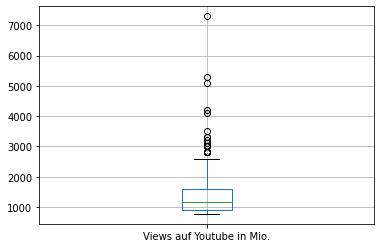

In [74]:
youtube_charts_dirty.boxplot()

In [75]:
youtube_charts_dirty[:40]

,Künstler/in,Song,Director,Views auf Youtube in Mio.
0,Luis Fonsi,Despacito,Carlos Pérez,7300.0
1,Ed Sheeran,Shape Of You,Jason Koenig,5300.0
2,Wiz Khalifa,See You Again,Marc Klasfeld,5100.0
3,Mark Ronson,Uptown Funk,Cameron Duddy,4200.0
4,Psy,Gangnam Style,Cho Soo-hyun,4100.0
5,Maroon 5,Sugar,David Dobkin,3500.0
6,Katy Perry,Roar,"Grady Hall, Mark Kudsi",3300.0
7,OneRepublic,Counting Stars,James Lees,3300.0
8,Ed Sheeran,Thinking Out Loud,Emil Nava,3200.0
9,Katy Perry,Dark Horse,Mathew Cullen,3100.0


Zum Schluss nochmals eine Kontrolle ob es keine Duplikate mehr gibt und ob es keine Werte gibt mit NaN.

In [76]:
Contains_NaN = youtube_charts_dirty.isnull() #Die fehlende Werte werden mit True gekennzeichnet
row_has_NaN = Contains_NaN.any(axis=1)  #Die Zeilen mit fehlenden Werten werden gespeichert
rows_with_NaN = youtube_charts_dirty[row_has_NaN]
rows_with_NaN

,Künstler/in,Song,Director,Views auf Youtube in Mio.


In [77]:
Duplikate2 = youtube_charts_dirty[youtube_charts_dirty.duplicated()]
Duplikate2

,Künstler/in,Song,Director,Views auf Youtube in Mio.


In [78]:
youtube_charts_dirty.to_csv("Hubacher_Lars_stage.csv", header=True)

## MariaDB
Hier wird eine Verbindung zu MariaDB aufgebaut. Der Code wurde von Student C (Tobias Gerahrd) erarbeitet und zur Verfügung gestellt. Somit stellt dies hier lediglich eine persönliche Übung dar, um Erfahrung zu sammeln.

In [79]:
#!pip install mariadb

In [80]:
import sys
import mariadb

In [81]:
try:
    conn = mariadb.connect(
      user="lars",
      password="1234",
      host="localhost",
      port=3306,
      autocommit=True) #So erübrigt sich conn.commit()
except mariadb.Error as e:
    print(f"Error connecting to MariaDB Platform: {e}")
    sys.exit(1)


In [82]:
cur = conn.cursor()

In [83]:
database_name = "CIP"

cur.execute("DROP DATABASE IF EXISTS " + database_name + ";") 
cur.execute("CREATE DATABASE " + database_name + ";")
cur.execute("USE " + database_name + ";")

In [84]:
db_table_name = "youtube_charts"
csv_file_name_path = "/home/student/Cloud/Owncloud/SyncVM/CIP_FS21/Pycharm/CIP_Project/Lars_Hubacher_stage.csv"
field_terminator = ","
line_terminator = "\n"
lines_to_be_igored = "1" #so wird die 1. Line (Column-Names) ignoriert

In [85]:
cur.execute("CREATE TABLE IF NOT EXISTS " + db_table_name + \
            "("
            "Artist varchar(255),"
            "Song varchar(255),"
            "Director varchar(255),"
            "Views_auf_Youtube_in_Millionen DECIMAL"
            ");"
            )

In [86]:
#Query zum Einlesen der Daten
query_insert = "LOAD DATA LOCAL INFILE '" + csv_file_name_path + \
                "' INTO TABLE " + db_table_name + \
                " FIELDS TERMINATED BY '" + field_terminator + \
                "' LINES TERMINATED BY '" + line_terminator + \
                "' IGNORE " + lines_to_be_igored + " LINES;"

#Ausführung des Queries bzw. tatsächlicher Import der Daten
cur.execute(query_insert)

InternalError: File '/home/student/Cloud/Owncloud/SyncVM/CIP_FS21/Pycharm/CIP_Project/Lars_Hubacher_stage.csv' not found (Errcode: 2)

## Lessons learned

In diesem Modul gab es für mich einige Hürden zu nehmen. Es war mein erstes Mal, dass ich mit Webscraping in Berührung kam. Daher dauerte es einige Zeit, bis ich mich im HTML-Code der Webseite zurecht fand.

Aus diesem Grund war wohl auch die Erarbeitung des ETL-Prozesses schwierig, da ich und auch meine Gruppe nicht genau wussten auf was geachtet werden muss bei der Auswahl von geeigneten Webseiten.

Nach dieser Hürde, kam die nächste beim schreiben des Python-Codes, um die Webseite zu scrapen. Ich musste feststellen, dass ich die Inhalte aus dem ersten Semester noch nicht vollständig verstanden hatte und musste daher einiges aufarbeiten. Dies führte aber dazu, dass ich durch das selbständige erarbeiten grosse Fortschritte erzielen konnte.

Die Bereinigung und Aufarbeitung der Daten war sehr zeitintensiv. Dennoch konnte ich wertvolle Erfahrungen sammeln, im Umgang mit Pandas. Häufig bereinigte ich die Daten zuerst auf eine bestimmte Art und Weise und nach einigen Tagen und zusätzlichen Recherchen fand ich einen Weg, wie man mit weniger Zeilen Code die Daten ebenfalls bereinigen und aufarbeiten kann.

Das Arbeiten in Gruppe war sehr angenehm während des ganzen Projekts. Der Austausch fand regelmässig statt und auch bei Bedarf war die Unterstützung stets vorhanden.

Insgesamt nehme ich aus diesem Projekt mit, dass es wichtig, für mich ohne viel Programmiererfahrung, mich vertieft mit den Einzelheiten der Abläufe der Codes zu befassen. Es lohnt sich, dort Zeit zu investieren, da es etwas sehr zufriedenstellendes ist, wenn ein Code am Ende das macht, was man von Anfang an geplant hatte.